# MOD007893 TRI2 F01CAM
# SID: 2226226

In [4]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

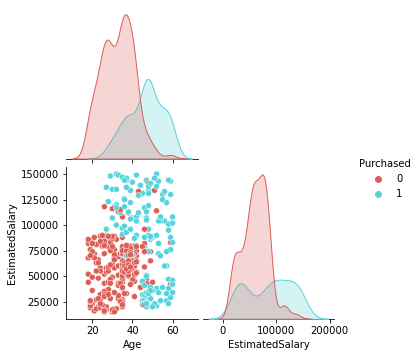

In [8]:
g = sns.pairplot(df, hue="Purchased", palette="hls",corner=True)

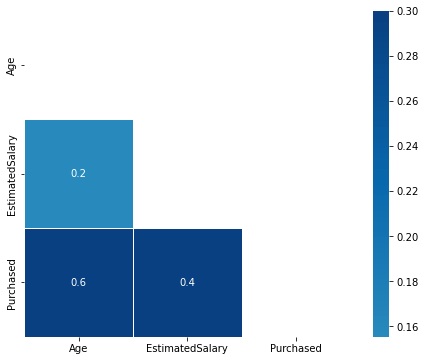

In [13]:
corr =  df.corr()
mask = np.zeros_like(corr, dtype=bool) #create mask to hide redundant half of heatmap
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(8,6))

sns.heatmap(df.corr(), mask=mask, cmap="GnBu", vmax=.3, center=0,
            square=True, annot=True, linewidths=0.5, fmt= '.1f',ax=ax) #heatmap to show correlation of features.
plt.show() #strongest correlation to purchased is age, then estimated salary

Split Dataset

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#test size set to 20%, random state = 0

Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
logpred=logistic_regression.predict(X_test)

In [29]:
logacc = round(accuracy_score(y_test,logpred),3)
logsens = round(recall_score(y_test,logpred),3)
logspec = round(recall_score(np.logical_not(y_test),np.logical_not(logpred)),3)
logpre = round(precision_score(y_test,logpred),3)
lognpre = round(precision_score(np.logical_not(y_test),np.logical_not(logpred)),3)
logf1 = round(f1_score(y_test,logpred),3)

print("****LOGISTIC REGRESSION RESULTS****")
print('Accuracy score for test set:',logacc)
print('Sensitivity score for test set:',logsens)
print('Specificity score for test set:',logspec)
print('Precision score for test set:',logpre)
print('Negative Precision score for test set:',lognpre)
print('F1 score for test set:',logf1)

****LOGISTIC REGRESSION RESULTS****
Accuracy score for test set: 0.888
Sensitivity score for test set: 0.864
Specificity score for test set: 0.897
Precision score for test set: 0.76
Negative Precision score for test set: 0.945
F1 score for test set: 0.809


In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 1)
dtree.fit(X_train, y_train)
decpred = dtree.predict(X_test)

In [33]:
# Evaluation metrics for Decision Tree
decacc = round(accuracy_score(y_test,decpred),3)
decsens = round(recall_score(y_test,decpred),3)
decspec = round(recall_score(np.logical_not(y_test),np.logical_not(decpred)),3)
decpre = round(precision_score(y_test,decpred),3)
decnpre = round(precision_score(np.logical_not(y_test),np.logical_not(decpred)),3)
decf1 = round(f1_score(y_test,decpred),3)

print("****DECISION TREE MODEL RESULTS****")
print('Accuracy score for test set:',decacc)
print('Sensitivity score for test set:',decsens)
print('Specificity score for test set:',decspec)
print('Precision score for test set:',decpre)
print('Negative Precision score for test set:',decnpre)
print('F1 score for test set:',decf1)

****DECISION TREE MODEL RESULTS****
Accuracy score for test set: 0.912
Sensitivity score for test set: 0.909
Specificity score for test set: 0.914
Precision score for test set: 0.8
Negative Precision score for test set: 0.964
F1 score for test set: 0.851


In [34]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state = 1)
rforest.fit(X_train,y_train)
rfpred = rforest.predict(X_test)

In [35]:
# Evaluation metrics for Random Forest
rfacc = round(accuracy_score(y_test,rfpred),3)
rfsens = round(recall_score(y_test,rfpred),3)
rfspec = round(recall_score(np.logical_not(y_test) , np.logical_not(rfpred)),3)
rfpre = round(precision_score(y_test,rfpred),3)
rfnpre = round(precision_score(np.logical_not(y_test),np.logical_not(rfpred)),3)
rff1 = round(f1_score(y_test,rfpred),3)

print("*****RANDOM FOREST MODEL RESULTS*****")
print('Accuracy score for test set:',rfacc)
print('Sensitivity score for test set:',rfsens)
print('Specificity score for test set:',rfspec)
print('Precision score for test set:',rfpre)
print('Negative Precision score for test set:',rfnpre)
print('F1 score for test set:',rff1)

*****RANDOM FOREST MODEL RESULTS*****
Accuracy score for test set: 0.925
Sensitivity score for test set: 0.909
Specificity score for test set: 0.931
Precision score for test set: 0.833
Negative Precision score for test set: 0.964
F1 score for test set: 0.87


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) 
kpred = knn.predict(X_test)

In [38]:
#Evaluation metrics for K-NN
knnacc = round(accuracy_score(y_test,kpred),3)
knnsens = round(recall_score(y_test,kpred),3)
knnspec = round(recall_score(np.logical_not(y_test) , np.logical_not(kpred)),3)
knnpre = round(precision_score(y_test,kpred),3)
knnnpre = round(precision_score(np.logical_not(y_test),np.logical_not(kpred)),3)
knnf1 = round(f1_score(y_test,kpred),3)

print("*******KNN MODEL RESULTS*******")
print('Accuracy score for test set:',knnacc)
print('Sensitivity score for test set:',knnsens)
print('Specificity score for test set:',knnspec)
print('Precision score for test set:',knnpre)
print('Negative Precision score for test set:',knnnpre)
print('F1 score for test set:',knnf1)

*******KNN MODEL RESULTS*******
Accuracy score for test set: 0.938
Sensitivity score for test set: 0.955
Specificity score for test set: 0.931
Precision score for test set: 0.84
Negative Precision score for test set: 0.982
F1 score for test set: 0.894


In [39]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 1)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

In [40]:
svmacc = round(accuracy_score(y_test,svmpred),3)
svmsens = round(recall_score(y_test,svmpred),3)
svmspec = round(recall_score(np.logical_not(y_test) , np.logical_not(svmpred)),3)
svmpre = round(precision_score(y_test,svmpred),3)
svmnpre = round(precision_score(np.logical_not(y_test),np.logical_not(svmpred)),3)
svmf1 = round(f1_score(y_test,svmpred),3)

print("*******SVM MODEL RESULTS*******")
print('Accuracy score for test set:',svmacc)
print('Sensitivity score for test set:',svmsens)
print('Specificity score for test set:',svmspec)
print('Precision score for test set:',svmpre)
print('Negative Precision score for test set:',svmnpre)
print('F1 score for test set:',svmf1)

*******SVM MODEL RESULTS*******
Accuracy score for test set: 0.888
Sensitivity score for test set: 0.864
Specificity score for test set: 0.897
Precision score for test set: 0.76
Negative Precision score for test set: 0.945
F1 score for test set: 0.809


In [41]:
#Comparison

In [44]:
#Comparison
lr = [logacc, logsens, logspec, logpre, lognpre, logf1]
dt = [decacc, decsens, decspec, decpre, decnpre, decf1]
rf = [rfacc, rfsens, rfspec, rfpre, rfnpre, rff1]
knn = [knnacc, knnsens, knnspec, knnpre, knnnpre, knnf1]
svm = [svmacc, svmsens, svmspec,svmpre, svmnpre, svmf1]
acc = pd.DataFrame([lr,dt,rf,knn,svm])

In [46]:
acc = acc.rename(columns={0: 'Accuracy', 1: 'Sensitivity', 2:'Specificity',3:'Precision',4:'Negative Precision',5:'F1 Score'})
acc = acc.rename(index={0:'Logistic Regression',1:'Decision Tree',2:'Random Forest',3:'K-NN',4:'SVM'})
acc.sort_values(by=['Accuracy'],ascending=0,inplace=True)
print(acc)

                     Accuracy  Sensitivity  Specificity  Precision  \
K-NN                    0.938        0.955        0.931      0.840   
Random Forest           0.925        0.909        0.931      0.833   
Decision Tree           0.912        0.909        0.914      0.800   
Logistic Regression     0.888        0.864        0.897      0.760   
SVM                     0.888        0.864        0.897      0.760   

                     Negative Precision  F1 Score  
K-NN                              0.982     0.894  
Random Forest                     0.964     0.870  
Decision Tree                     0.964     0.851  
Logistic Regression               0.945     0.809  
SVM                               0.945     0.809  


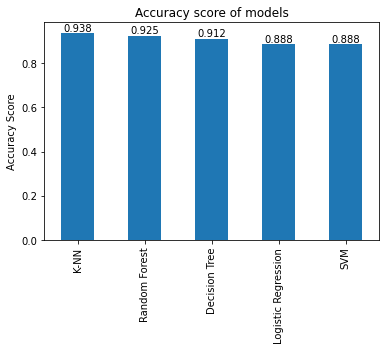

In [47]:
ax = acc.Accuracy.plot.bar(ylabel = 'Accuracy Score',title='Accuracy score of models')
for container in ax.containers:
    ax.bar_label(container)
#So, K-NN had the highest accuracy score